### A little python script to plot collection date of each sample

In [10]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
# import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

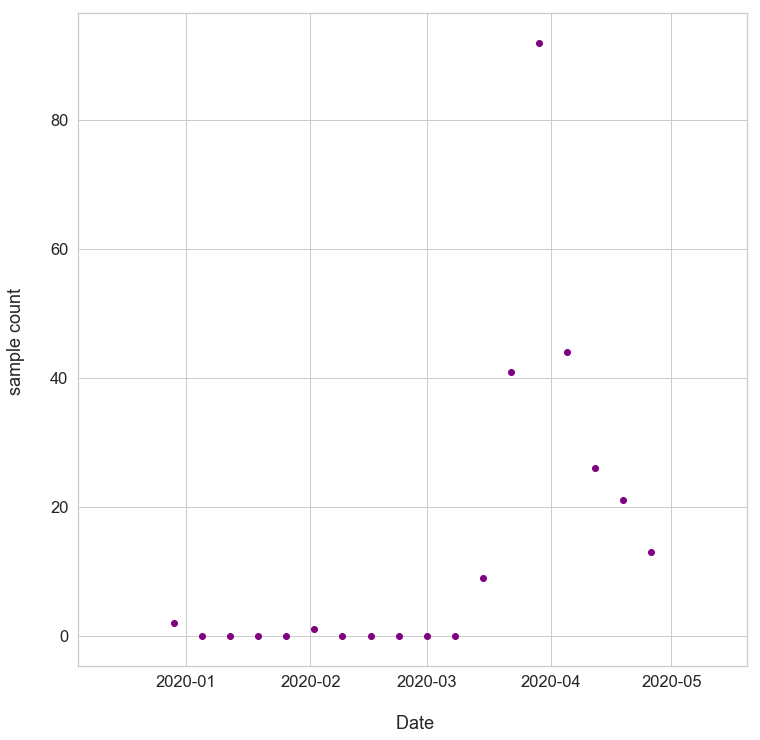

<Figure size 432x288 with 0 Axes>

In [76]:
#load data and drop all but sample name + collection date
DF = pd.read_csv('../builds/Wisco-Build/data/attributes.csv')
DF = DF[['name', 'Collection Data']]
DF = DF.rename(columns={'Collection Data': 'date'})
DF['name'] = 1
DF.index = DF['date']
DF['Date'] = pd.to_datetime(DF.date)
DF = DF[['name', 'Date']]
DF.sort_values(by='Date', inplace=True)
DF['datetime'] = pd.to_datetime(DF['Date'])
DF.index = DF['datetime']

DF1 = DF.resample('W').sum()

DF1 = DF1.reset_index()

DF1

# # Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# # Add x-axis and y-axis
ax.scatter(DF1.datetime.values, DF1.name.values, color='purple')

# Set title and labels for axes
ax.set(xlabel="\n Date",
       ylabel="sample count \n")

plt.show()

plt.savefig('../figures/supplementary_figure_3.png', DPI=300)